In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('kidney_disease_data.csv')

pd.set_option('display.max_columns', None)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

ChatGPT:

In [4]:
df.columns = [
    'patient_id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 
    'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 
    'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 
    'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 
    'classification'
]

In [5]:
df.head()

,patient_id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' should be numerical data, it seems that the numbers are written as strings

In [7]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce') # Non-numeric values are converted to NaN
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

Now we have our proper categorical and numerical data set, we will analyze the values of categorical data

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

Unique values in 'red_blood_cells':
[nan 'normal' 'abnormal']

Unique values in 'pus_cell':
['normal' 'abnormal' nan]

Unique values in 'pus_cell_clumps':
['notpresent' 'present' nan]

Unique values in 'bacteria':
['notpresent' 'present' nan]

Unique values in 'hypertension':
['yes' 'no' nan]

Unique values in 'diabetes_mellitus':
['yes' 'no' ' yes' '\tno' '\tyes' nan]

Unique values in 'coronary_artery_disease':
['no' 'yes' '\tno' nan]

Unique values in 'appetite':
['good' 'poor' nan]

Unique values in 'pedal_edema':
['no' 'yes' nan]

Unique values in 'anemia':
['no' 'yes' nan]

Unique values in 'classification':
['ckd' 'ckd\t' 'notckd']



In [9]:
columns_to_clean = ['diabetes_mellitus', 'coronary_artery_disease', 'classification']

# Apply str.strip() to remove leading and trailing whitespace characters
for col in columns_to_clean:
    df[col] = df[col].str.strip()
    
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

Unique values in 'red_blood_cells':
[nan 'normal' 'abnormal']

Unique values in 'pus_cell':
['normal' 'abnormal' nan]

Unique values in 'pus_cell_clumps':
['notpresent' 'present' nan]

Unique values in 'bacteria':
['notpresent' 'present' nan]

Unique values in 'hypertension':
['yes' 'no' nan]

Unique values in 'diabetes_mellitus':
['yes' 'no' nan]

Unique values in 'coronary_artery_disease':
['no' 'yes' nan]

Unique values in 'appetite':
['good' 'poor' nan]

Unique values in 'pedal_edema':
['no' 'yes' nan]

Unique values in 'anemia':
['no' 'yes' nan]

Unique values in 'classification':
['ckd' 'notckd']



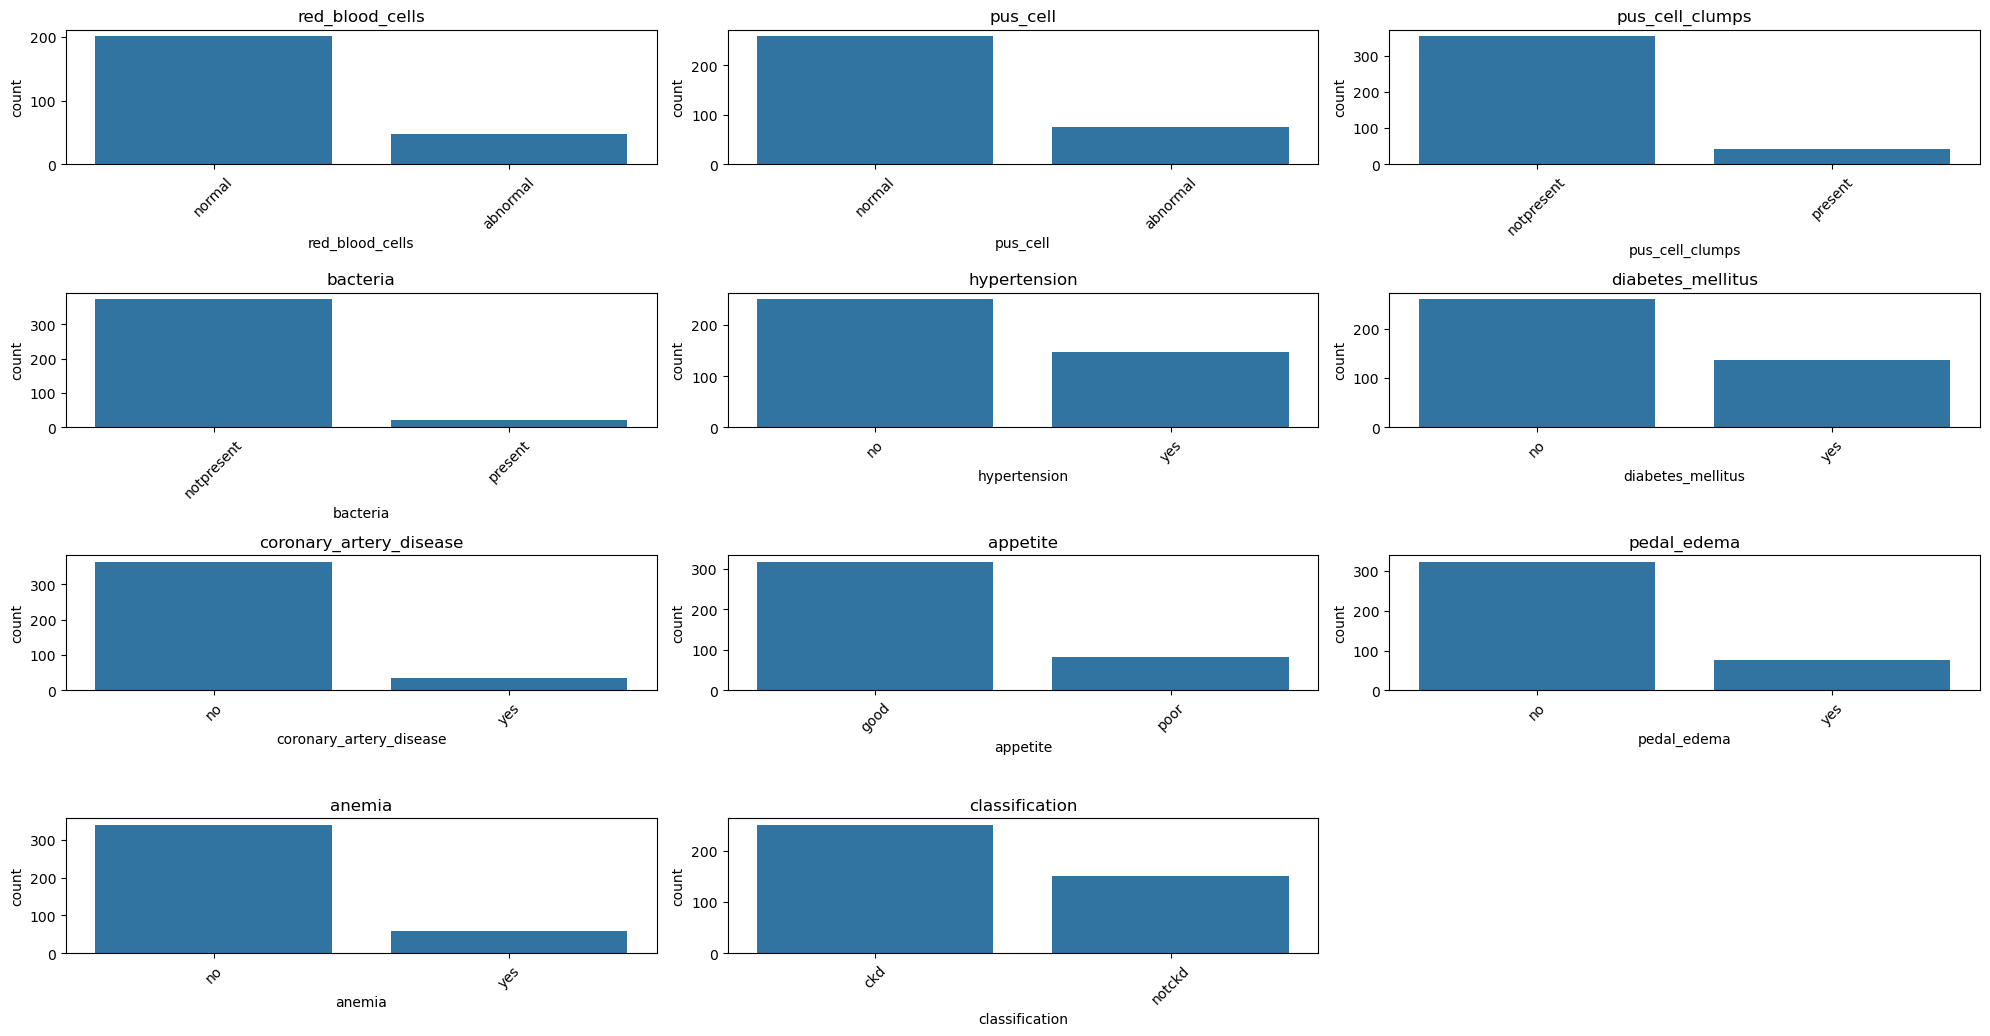

In [10]:
plt.figure(figsize=(20, 15))
num_cols = 3
num_rows = len(numerical_columns) // num_cols + 1 # Extra row just in case

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

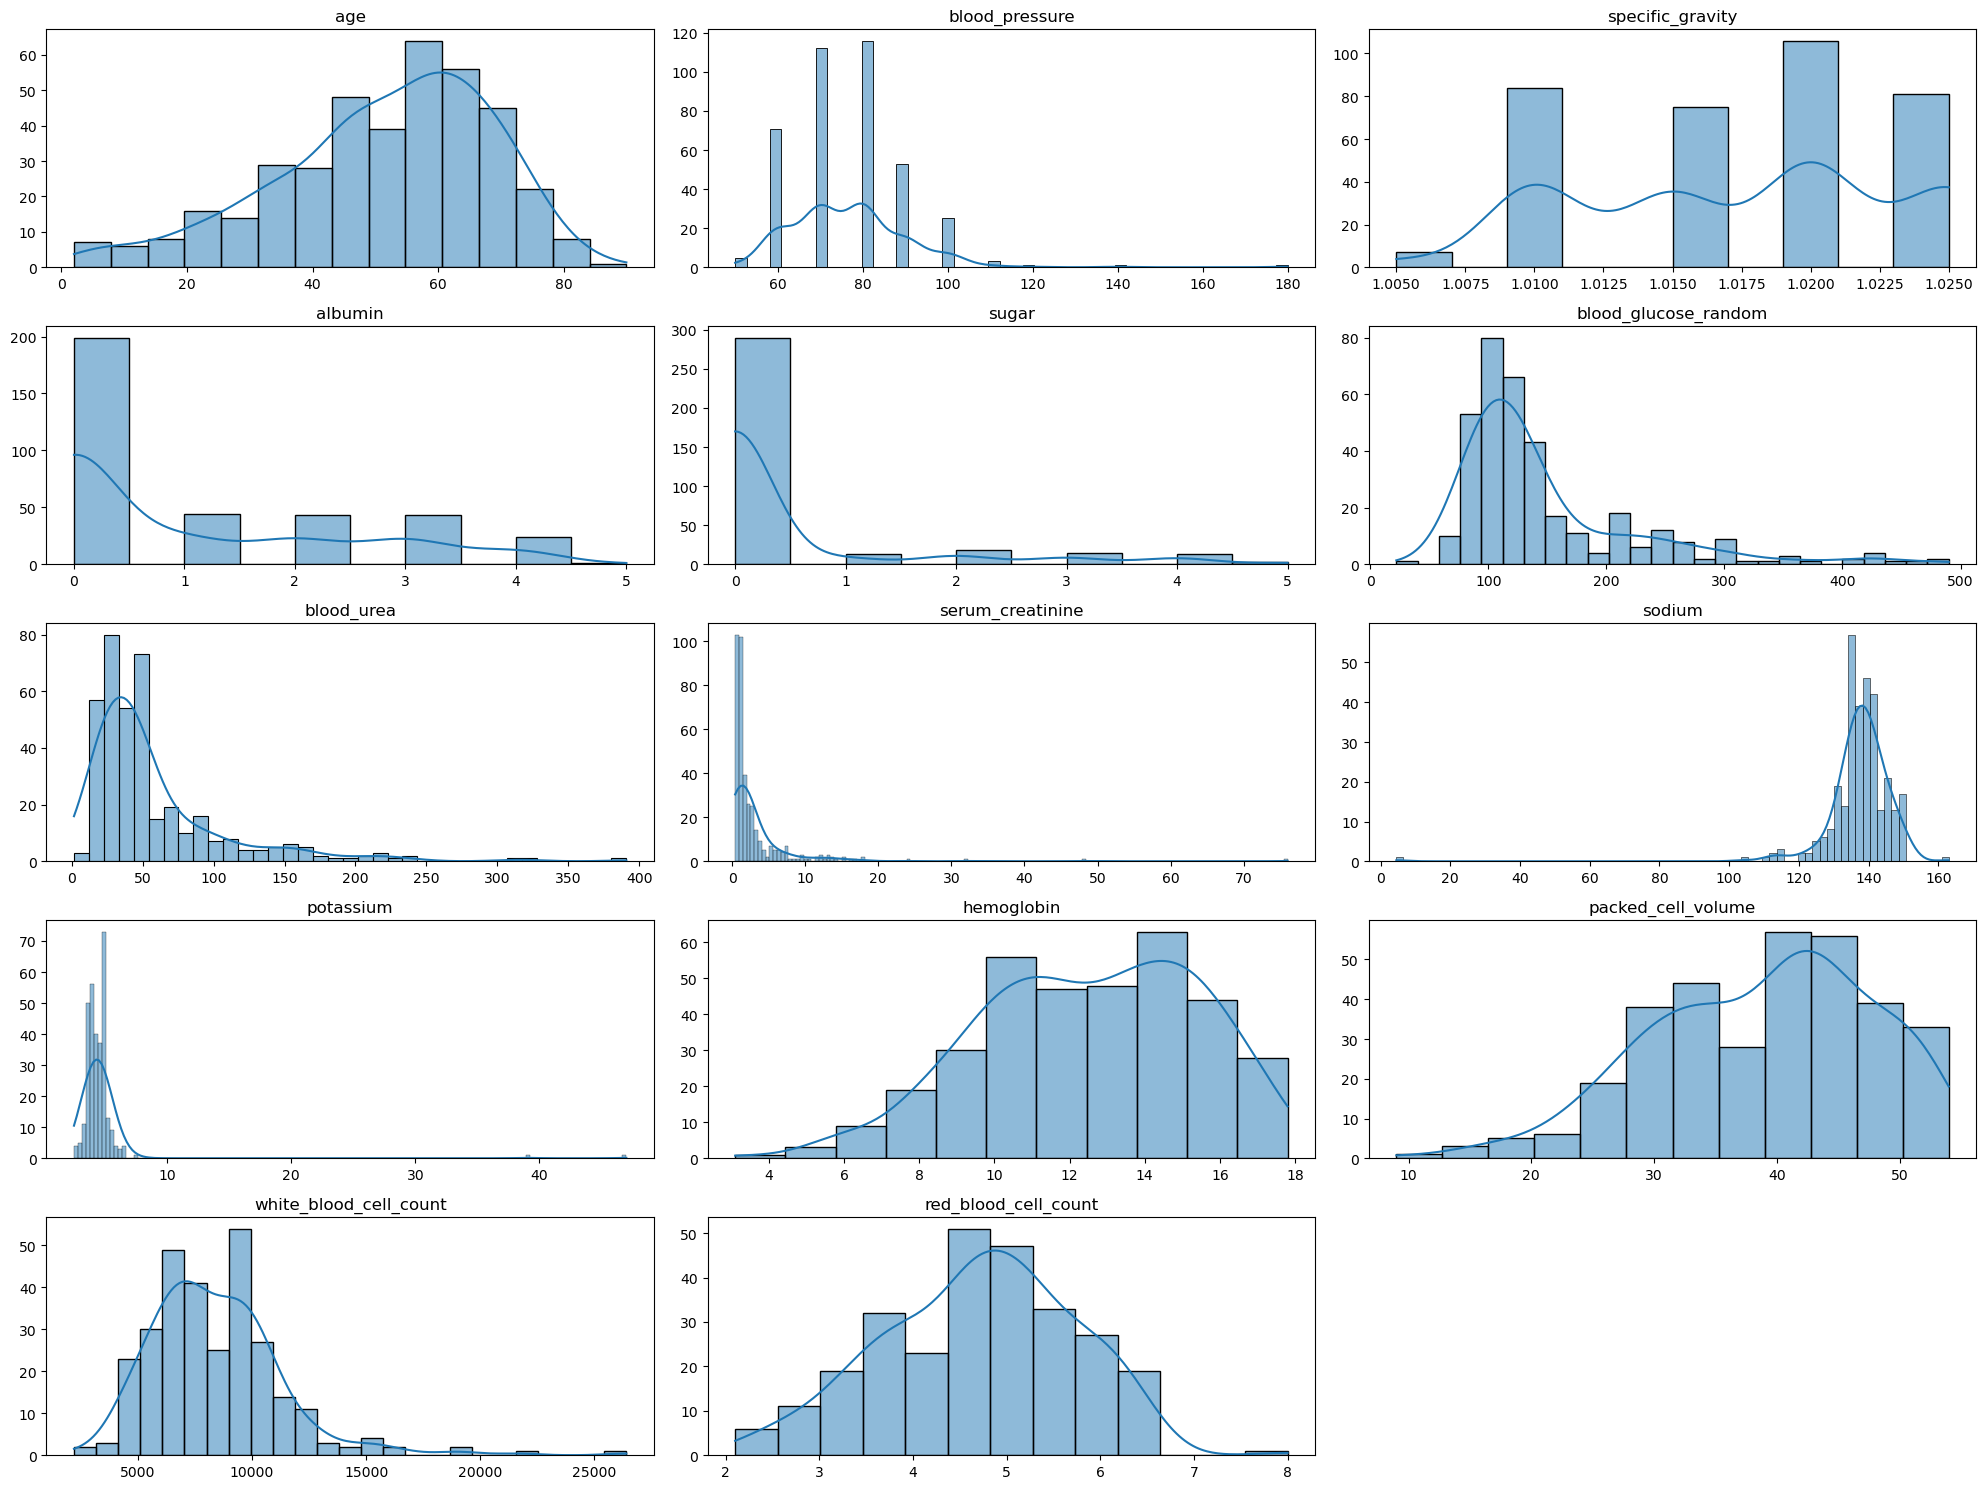

In [11]:
numerical_columns = numerical_columns.drop('patient_id')

plt.figure(figsize=(20, 15))
num_cols = 3
num_rows = len(numerical_columns) // num_cols + 1

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Model building

In [12]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

In [13]:
# Fill missing values for numerical columns using the mean
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Fill missing values for categorical columns using the mode
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

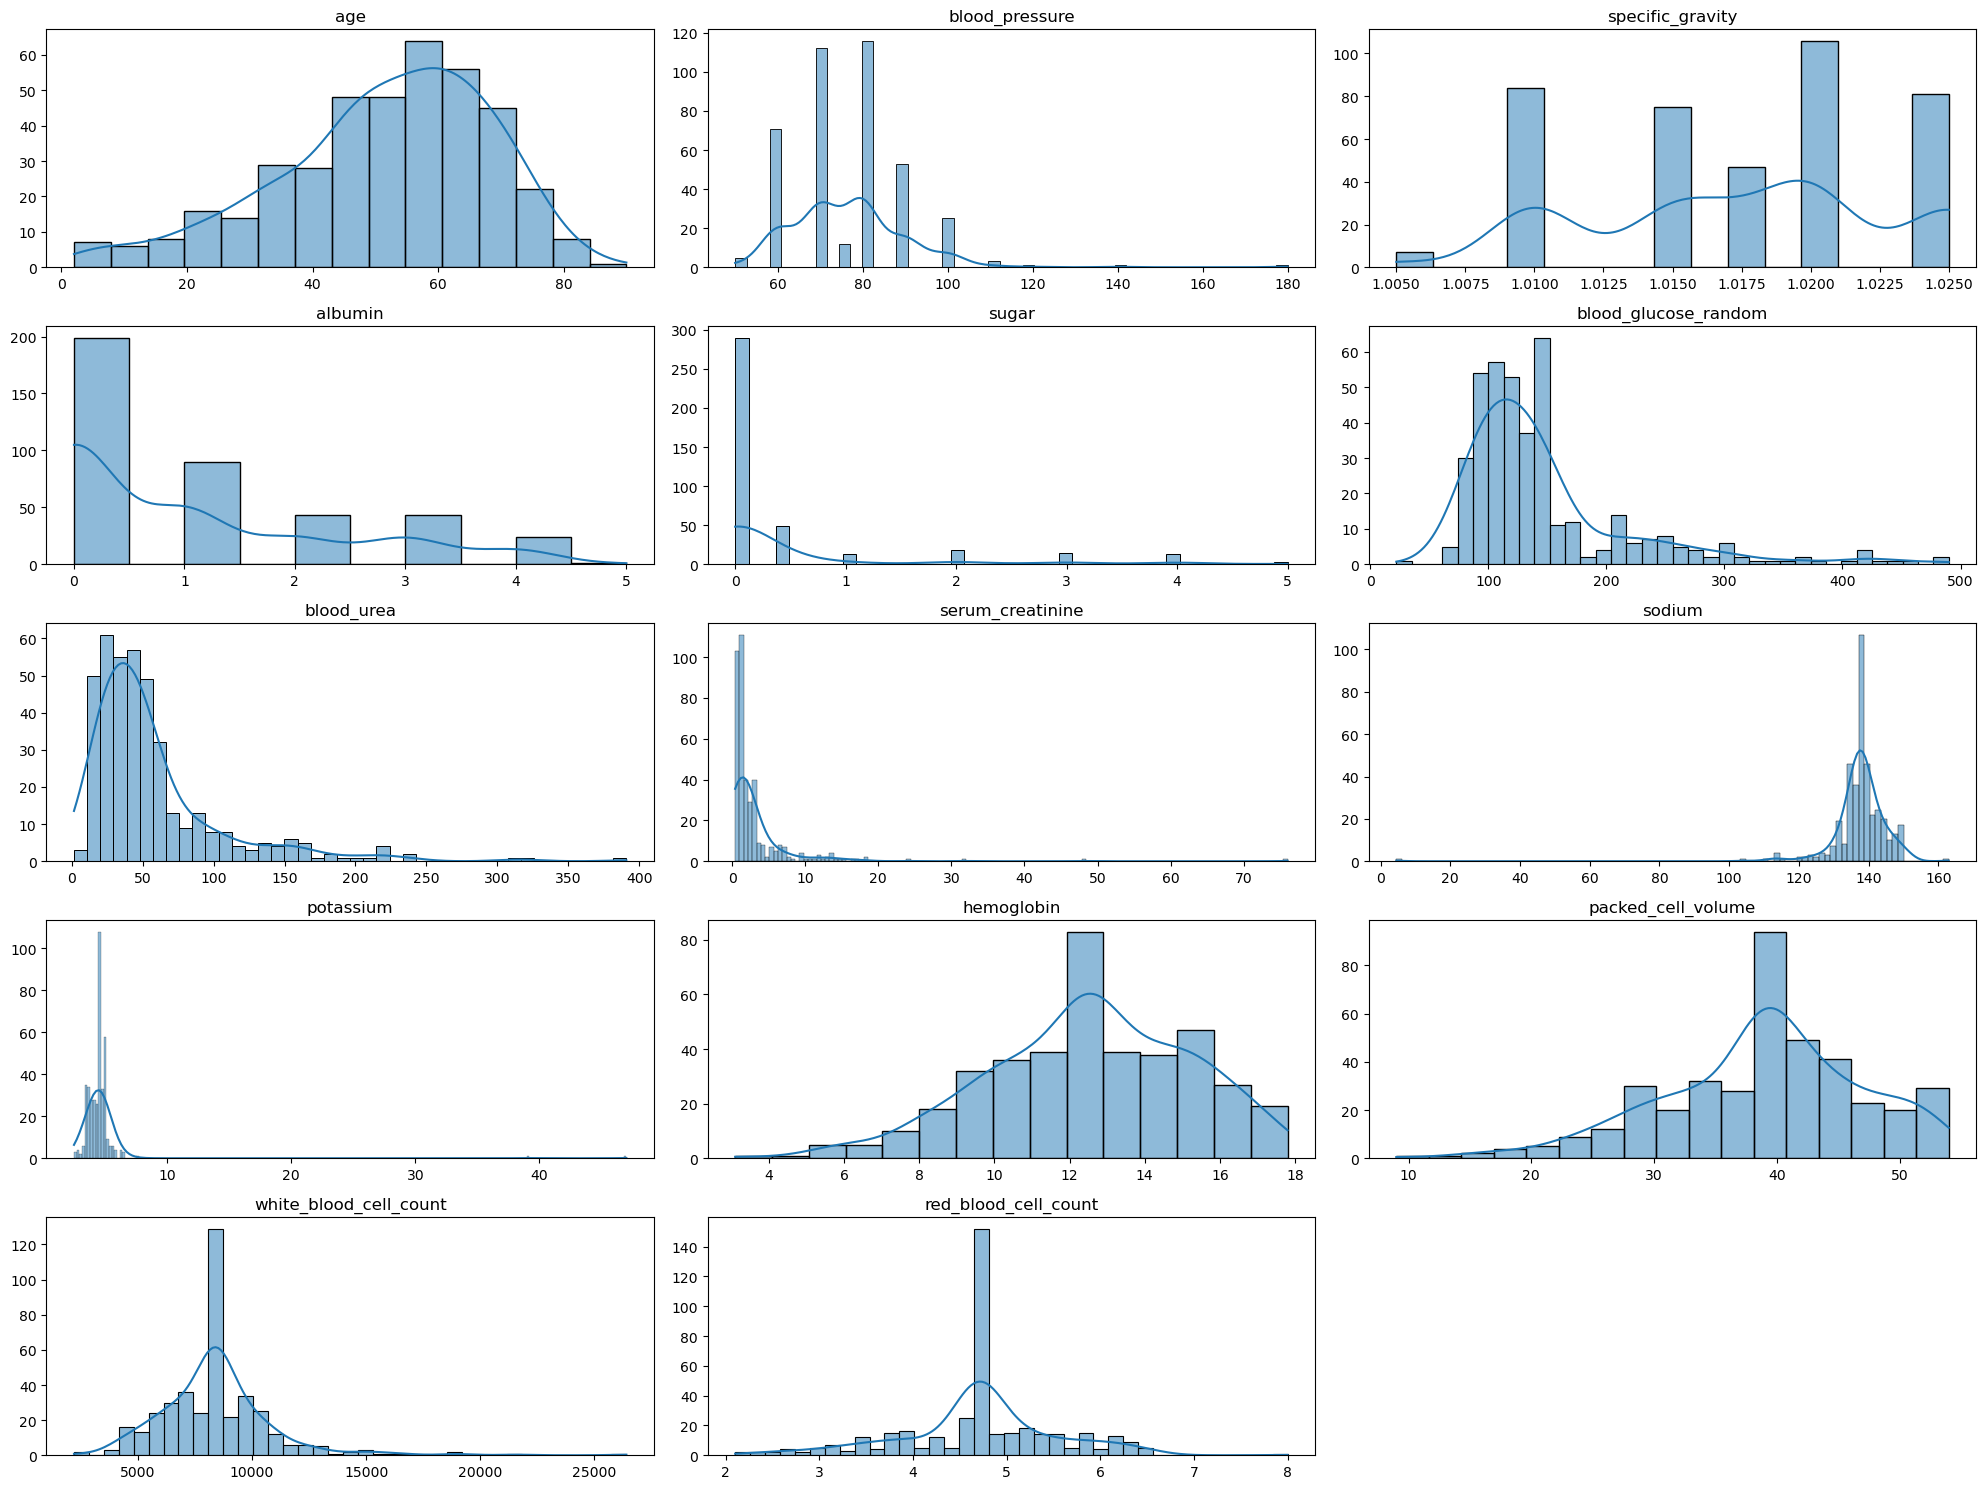

In [14]:
# Experimento

plt.figure(figsize=(20, 15))
num_cols = 3
num_rows = len(numerical_columns) // num_cols + 1

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Random Forest Classifier

In [15]:
X = df.drop('classification', axis=1)
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:")
print(accuracy_rf)

Confusion Matrix:
[[52  0]
 [ 0 28]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Accuracy Score:
1.0


Gradient boosting classifier

In [16]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))
print("\nAccuracy Score:")
print(accuracy_gb)

Confusion Matrix:
[[52  0]
 [ 0 28]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Accuracy Score:
1.0


In [17]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score:")
print(accuracy_xgb)

Confusion Matrix:
[[52  0]
 [ 0 28]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Accuracy Score:
1.0


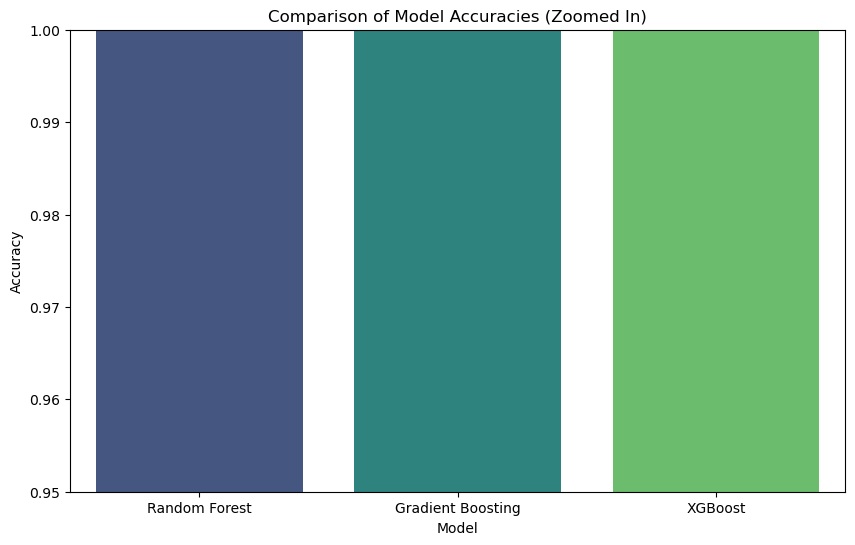

In [18]:
accuracy_scores = {
    'Random Forest': accuracy_rf,
    'Gradient Boosting': accuracy_gb,
    'XGBoost': accuracy_xgb
}
# Convert the accuracy scores to a DataFrame for easy plotting
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.ylim(0.95, 1)  # Adjust the range to zoom in
plt.title('Comparison of Model Accuracies (Zoomed In)')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.show()